# 2020.01.15

# PCA : 주성분 분석 => 모델 전처리에 사용

상관계수행렬와 공분산행렬 => 고유값분해

변수간의 다중공선성이 있는지 확인해서 노이즈잡음제거 / 변수중요도를 알아보기 위해서 사용함

모든 변수들을 각 그 안에 있는 데이터들을 섞어서 종속변수에 큰 영향을 주는 변수들을 새롭게 만들어내서 주성분을 뽑아낸다 .

### 공분산 (covariance) : cov()
- 두변량이 각각의 평균으로부터 변화하는 방향 및 양에 대한 기대값
- 공분산이 +면 한변수값이 증가할때 다른변수값도 증가함

두변수의 단위에 의존하여 다른데이터와 비교시 불편 => 상관계수사용

### 상관계수 = 표준화된 공분산 (pearson correlation coefficient) : cor() 
- 공분산은 각변량의 단위에 의존(변동크기량 모호)
- 공분산을 각 변량의 표준편차로 나누어 표준화
양의 값이면 두변수가 같은 방향으로 움직임 / 음이면 반대 / 0이면 선형관계없음

출처: https://rfriend.tistory.com/126 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

## 고유값 분해 => 특징추출 (pandas 초기에 설명함??)
고유값과 고유벡터로 확인됨 ( 내적=0 일때는 정직교함 => 이미지로 볼것)

# MDS 다차원척도법 => 시각화

데이터 @ 임의의 직교행렬
(50,10) @ (10,2) = (50,2) 변수들을 고려해서 2차원 시각화 => 재해석함

10변수를 10차원인데 시각화가 불가함 => 2차원으로 시각화 하기 위해 내적

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 이미지를 파일로 출력하고 로딩한 다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


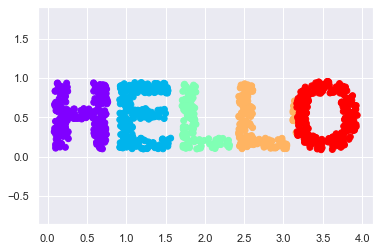

In [2]:
X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal');

(1000, 2)
<class 'list'>


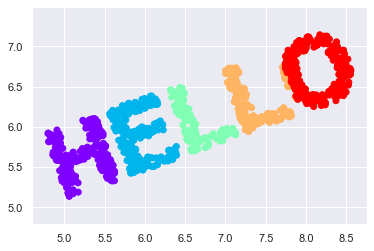

In [3]:
print(X.shape)
def rotate(X, angle): # 앵글(사람이 읽는 각도)
    theta = np.deg2rad(angle)    # 라디안 - 호의 길이 ( 컴퓨터가 읽는 각도)
    R = [[np.cos(theta), np.sin(theta)],   # 2차원 행렬회전 : [x축,y축] 표현
         [-np.sin(theta), np.cos(theta)]]  
    print(type(R))
    return np.dot(X,R)   # 1000X2  2X2  => 1000X2
X2 = rotate(X, 20) + 5   # +5 : 밑에 원점에서 잘리지 않게하려고
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal');

(1000, 1000)


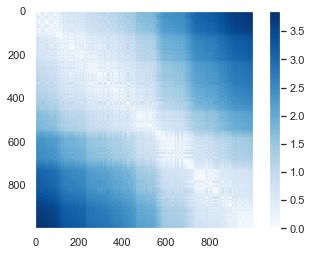

In [4]:
# 각 점들간의 상호거리 (euclidian distance)

from sklearn.metrics import pairwise_distances  # 디폴트 - 유클리디안거리(피타고라스)
D = pairwise_distances(X)  # 거리행렬
print(D.shape)
D[:5,:5]

# 이미지화
plt.imshow(D,zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar();

In [5]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)  #True : 모든 점들의 거리가 동일하다 = 원형을 유지하고 있음

True

In [ ]:
# 다시보기

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


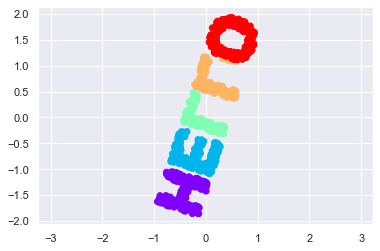

In [6]:
# 다형체 (manifold)
from sklearn.manifold import MDS

# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components=2, dissimilarity = 'precomputed', random_state =1)  
#               요소2개,     precomputed : 미리계산되어진 거리,    MDS로 1
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal');
print(out)

In [7]:
# 고유값 분해
import numpy as np
rng = np.random.RandomState(10)   # 초기화. seed값(어디서 랜덤시작)
C = rng.randn(3,3)  # 정규분포 normal (3X3)
print(np.dot(C, C.T))  # 전치행렬, 행렬의 거듭제곱
# 행렬의 거듭제곱 => 정방행렬이면서 대칭행렬이 나온다

# 고유값 분해(eigenvector)
e, V = np.linalg.eigh(np.dot(C,C.T))
print("eigenvector", V)   # 고유벡터
print("eigenvector", e)   # 고유값

# 두 벡터의 내적을 내서
np.dot(V[1], V[2])   # => 거의 0 == 직교한다   ( 고유값분해해서 나온 벡터를 내적하면 고유벡터는 정직교한다)

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvector [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [8]:
# 2차원 -> 3차원으로 변환

# random 이라서 MDS는 분석말고 시각화용으로만 사용
def random_projection(X, dimension = 3, rseed = 42):   
    assert dimension >= X.shape[1]  # 들어오는 데이터의 shape하면 2차원이면 행,열로 나온다
  #     차원 확대만 가능함 (dimension >=)  
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)  # 3X3
    print("C는", C.shape)
    print(np.dot(C, C.T))  # 제곱 => 정방행렬이면서 대칭행렬
    
    e, V = np.linalg.eigh(np.dot(C, C.T))  # 고유분해 (고유치, 고유벡터 ) => 직교
    print("V는", V.shape)  # 3X3
    print("차원은", V[:X.shape[1]]) # 원래데이터 2차원
    return np.dot(X, V[:X.shape[1]])  # 2X3 변환 

print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)

X3 = random_projection(X,3)
X3.shape  # (1000,3) => 3차원으로 변환

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

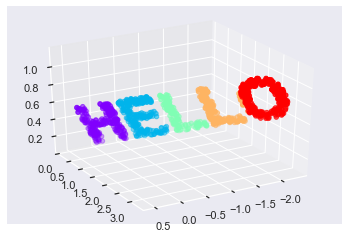

In [9]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim = 60, elev=30)    # 3차원에서 카메라 각도정하기 - azim(좌우), elev(상하)

In [ ]:
# 다시보기

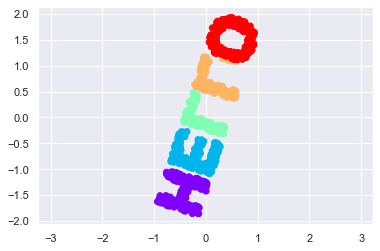

In [10]:
# 다시 차원축소 (원래대로 돌아가기)

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal');

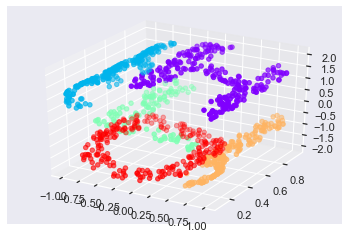

In [11]:
def make_hello_s_curve(X):
    t = (X[:,0]-2)*0.75* np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t)-1)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:,0], XS[:,1], XS[:,2], **colorize);

# MDS는 비선형에 취약, 선형에는 강하지만

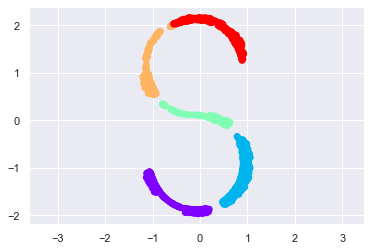

In [12]:
# MDS는 비선형에서 모양유지가 안됨
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal');

# LLE (locally linear embedding)
     - 비선형에 강함

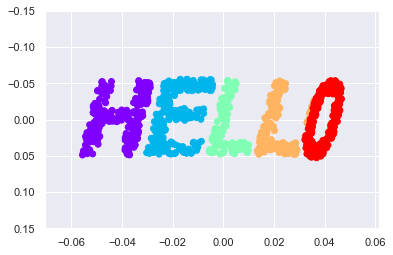

In [13]:
# LLE (locally linear embedding) - 비선형에 강함
from sklearn.manifold import LocallyLinearEmbedding  

# 가까이에 있는 100개의 요소를 확인하고 2차원으로 차원축소 
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver ='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15);

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

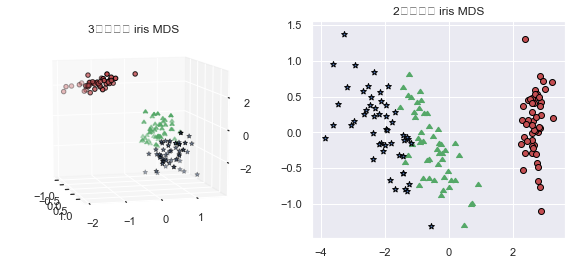

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn import manifold   # 다형체명령
from sklearn.manifold import MDS  # 
from mpl_toolkits import mplot3d  # 3차원 출력
import numpy as np
import os   # 디렉터리 관리

CHART_DIR = "./"  # ? 
colors = ['r', 'g', 'b']
markers = ['o', 6, '*']

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')  # 바탕색
    mds = manifold.MDS(n_components=3) # 변수 4개 -> 3개   (시각화는 3차원이나 2차원)
    Xtrans = mds.fit_transform(X)   # 직교하는 행렬   # 150X3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(               # 3개
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
            # y가 같은 것끼리 색 동일   
    
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15)  # 카메라 각도 조절

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 
    
plot_iris_mds()

# Kmeans : 군집분석 => 종속변수결정
    - 압축: 팔레트, 실제데이터 : 팔레트 번호 (256) 1바이트로 표현가능
    - 원형이상치 제거
    - 미리 군집화해서 문제해결에 도움을 준다
    
- 알고리즘 - k값을 결정(군집수결정), 중심값
- 문제점 : 이상치에 민감

- kmeans의 척도 : 거리값( 피타고라스의 정리 -> euclidian distance)     <= 중심과의 거리

- DBSCAN : eps 기본거리값, 군집이 되기 위한 최소 요소수 (kmeans문제점 해결로 나옴)       <= 이웃간의 거리
       - 핵심, 경계, 어느 군집에도 속하지 않는 것  으로 나눠짐

In [9]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)

# norm 원점으로 부터의 크기 (단일)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype = np.float32)

# euclidian distance - 특성간의 거리가 가까운지를 알아보기위해
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric = "manhattan")   # manhattan : 수평수직

from sklearn.metrics.pairwise import euclidean_distances    # euclidian_distances 불러오기

In [10]:
from sklearn.svm import SVC   # Classification 분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  
# kmeans, PCA는 전처리에 민감하다   <- 반드시 스케일링을 해줘야한다

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)  # 훈련용 트렌스폼해주면 

svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)   # 테스트용도 트렌스폼 해줘야한다
print("테스트 점수:{:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수:0.95


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
# grid : 격자, 그물망
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)  # 5덩어리로 나누기
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도:{:.2f}".format(grid.best_score_))
print("테스트 점수:{:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적읜 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도:0.98
테스트 점수:0.97
최적읜 매개변수:  {'C': 1, 'gamma': 1}


pipe 로 해보기

In [12]:
# pipeline 으로 해보기

from sklearn.pipeline import Pipeline

# scaler 이름을 정해주는것 :참조:파라미터 전달
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])  
pipe.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
# pipeline으로 해보기
# grid : 격자, 그물망

# SVC() 대신 pipe 
# 이름 호출 : 'svm__C'와 'svm__gamma' 로 바꾸기

# pipeline + GridSearchCV은 다양한 테스트 문제를 해결

from sklearn.model_selection import GridSearchCV

# regulaization 규제 : 과적합방지
# C : 규제강도 정하기 - 처음에는 범위를 넓게 해서 정하기 -> 그 다음 깊숙히 들어가기
param_grid = {'svm__C':[0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 5)  # 5덩어리로 나누기
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도:{:.2f}".format(grid.best_score_))
print("테스트 점수:{:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적읜 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도:0.98
테스트 점수:0.97
최적읜 매개변수:  {'svm__C': 1, 'svm__gamma': 1}


Kmeans 예시

array([[5.9245283 , 2.7509434 ],
       [4.77777778, 2.94444444],
       [6.8804878 , 3.09756098],
       [5.22068966, 3.66551724]])

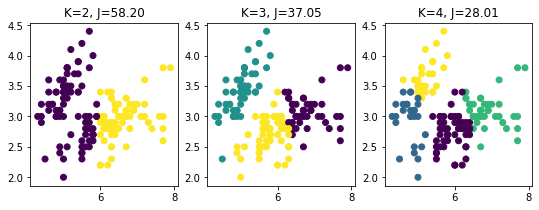

In [14]:
# 초기 중심값이 결정 입력 => 중심을 지속적으로 변화 ( 중심점이 움직이지 않을 때 까지)
# 중심과의 거리값이 중요!! 

from sklearn import cluster, datasets 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()

X = iris.data[:,:2]   # 전체변수는 4개인데 2개의 값만 사용
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

# 이미지 출력
plt.figure(figsize = (9,3))

plt.subplot(131)                               # _ : 결과값  # 군집번호 : labels_
plt.scatter(X[:,0], X[:,1], c=km2.labels_)  # c : 컬러 2개값 결정 (0,1) : 
plt.title("K=2, J=%.2f" % km2.inertia_)   # inertia_ : 군집 내부거리 값

plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133) 
plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

# 중심값 출력
km4.cluster_centers_

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


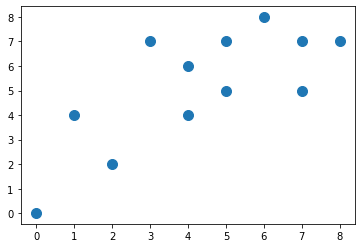

In [15]:
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],[0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])  # 12X2
print(X)
plt.scatter(X[:,0],X[:,1], s = 100) # s = size
plt.show()

centering 

12


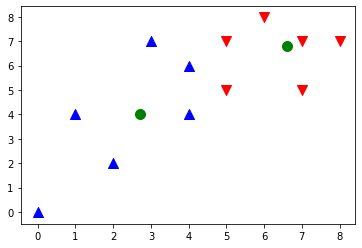

In [16]:
from sklearn.cluster import KMeans

# 레이블 : 군집번호 : 종속변수 = 12개 (관측치 갯수별로)
# 중심점 : 2개 (열)
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_))  # 12

# 시각화

# boolean index ( labeldl 0 인 것만 ture.. 이런식)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')

plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')

plt.scatter(c0[0], c0[1], s=100, c="g")  # 중심점
plt.scatter(c1[0], c1[1], s=100, c="g")  # 중심점
plt.show()


# 이미지 로드 & 압축

In [17]:
# 이미지 로드
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [18]:
from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [19]:
n_colors=64

# 1바이트 = 8비트 = 표현종류 => 256가지
china = load_sample_image("flower.jpg")   # 이미지는 RGB(색) 숫자화로 저장 ( 256컬러 :1바이트)

# 컬러값 정규화 0~1 정규화  (0~1사이값이로 나오게)
china=np.array(china, dtype=np.float64)/255   # 0부터 시작해서 255로 나눔

In [20]:
# 가로(w), 세로(h), 컬러값(d)
w,h,d = original_shape = tuple(china.shape)  # 왜 3개? -> 이미지 사이즈가 행X열, 3가지 컬ㄹ..?
print(w,h,d)   # 427 X 640, 3
assert d == 3  # RGB만 들어와라. (흑백은 1바이트)
image_array=np.reshape(china, (w*h,d))  # 2차원으로 변환. (가로X세로 ->1차원되니까 컬러까지해서 총 2차원)

427 640 3


In [21]:
# 모델만들기 

# 1000개의 행
image_array_sample = shuffle(image_array, random_state=0)[:1000]   # shuffle : 섞어라 그리고 처음부처 1000개의 행을 뽑아라

# 64컬러로 군집화
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)  # 뽑은 1000개의 행으로  64컬러로 피팅하기 

# 중심값결정 64

In [22]:
# 군집화된것으로 이미지 예측을 해라

labels = kmeans.predict(image_array)  # 라벨  427 X 640             ????????



In [23]:
def recreate_image(codebook, labels, w,h):  # 64 컬러값, 이미지 픽셀수     (codebook 이 중심값)
    d = codebook.shape[1]  # 64개의 중심값 64 X 3(RGB) 
    image = np.zeros((w,h,d))  # 원래 이미지 사이즈
    label_idx=0  # 인덱스는 0부터
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

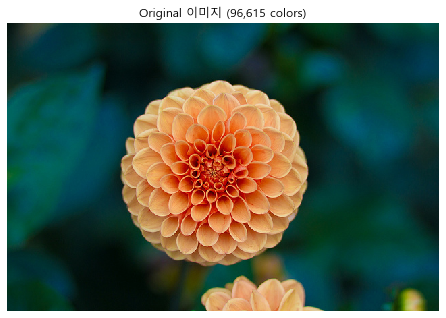

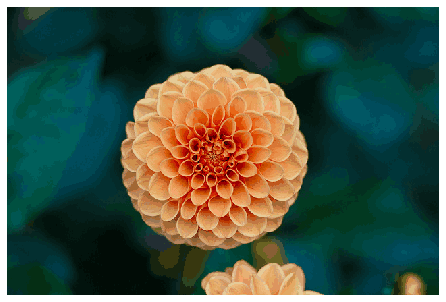

In [24]:
# 원본이미지
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)

# 압축한 모델 이미지 - recreate_image 불러오기
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')

# 64 컬러
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w,h))

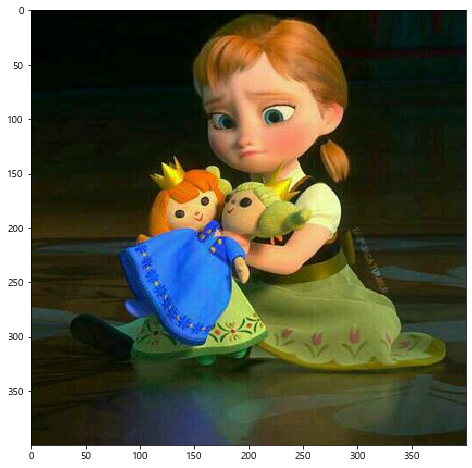

In [25]:
image = plt.imread("anna.jpeg")
plt.figure(figsize = (15,8))
plt.imshow(image)

In [26]:
# 사이즈 확인
image.shape 

(400, 400, 3)

In [27]:
# 바이트수
image.shape[0] * image.shape[1] * image.shape[2]

480000

In [28]:
x,y,z = image.shape
image = np.array(image, dtype=np.float64)/ 255
image_2d = image.reshape(x*y, z)  # kmeans는 3차원을 읽지 못한다. 그래서 2차원으로 만들어준다.
image_2d.shape

(160000, 3)

In [29]:
kmeans_cluster = cluster.KMeans(n_clusters=16)   # 중심값 16개 (압축 훈련세트)
kmeans_cluster.fit(image_2d)   # 내거에 피팅? 
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.52491685, 0.54946906, 0.26588141],
       [0.10239398, 0.10782228, 0.03024938],
       [0.1835494 , 0.49580031, 0.93294175],
       [0.7643666 , 0.79770452, 0.32527777],
       [0.17381035, 0.23570147, 0.1926924 ],
       [0.7879229 , 0.52758621, 0.29931873],
       [0.31209737, 0.28303833, 0.09687499],
       [0.16935061, 0.17049621, 0.06656179],
       [0.93725428, 0.66838663, 0.45300527],
       [0.77085277, 0.42376456, 0.08019496],
       [0.30094532, 0.36581713, 0.23134533],
       [0.10496533, 0.33668638, 0.81790052],
       [0.92961841, 0.84770744, 0.58865218],
       [0.02366881, 0.05671031, 0.0222271 ],
       [0.14576335, 0.23457106, 0.40022219],
       [0.49341848, 0.37947296, 0.12000104]])

In [30]:
len(cluster_centers)  # 중심점 갯수

16

In [31]:
cluster_centers.shape   

(16, 3)

In [32]:
# 레이블 갯수 :image.shape[0] * image.shape[1]

cluster_labels = kmeans_cluster.labels_
cluster_labels

array([13, 13, 13, ...,  1,  1,  1])

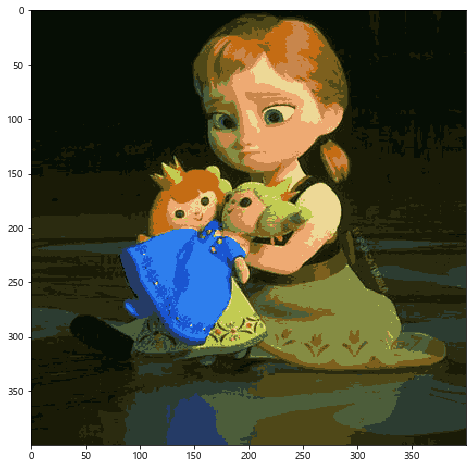

In [33]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

# 원형이상치 제거

In [34]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)  # 중심이 1개인 100개의 데이터 만듬

In [35]:
kmeans = KMeans(n_clusters=1)  # 중심1
kmeans.fit(X)
distances = kmeans.transform(X)  # kmeans.transform : 각데이터의 중심으로부터의 거리값으로 변환 (각도를)

# ravel() : 1차원으로 만들기  
# argsort : 인덱스를 sort 해라  값크기 (기준으로) -> 이 값을 기준으로 인덱스를 매겨서 다른것을 control 하기위해서
# 2개가 
# -1 : 내림차순으로 변경
# 처음부처 5개 까지만
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


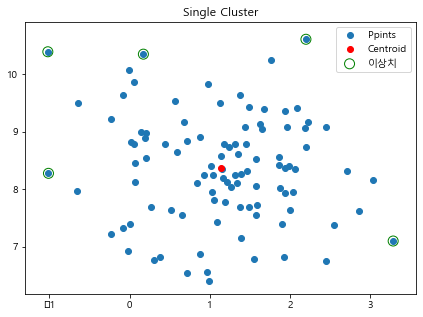

In [36]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')

# 중심점
ax.scatter(X[:,0], X[:,1], label='Ppints')
ax.scatter(kmeans.cluster_centers_[:,0], 
           kmeans.cluster_centers_[:,1],
           label='Centroid', color='r')

# 이상치
ax.scatter(X[sorted_idx][:,0], 
           X[sorted_idx][:,1], 
           label='이상치', edgecolors='g', facecolors='none', s=100)
ax.legend(loc='best')

# PCA

- PCA: Principle componenet Analysis 주성분 분석
- 모델 입력 전달에서 특징 추출(noise 제거)
- PCA의 결과를 모델의 변수로 추가하면 정확도 상승


In [37]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])  # 6X2 
# 관측치 6개, 열2개

# ????설명력??? 주성분?? 
# 모든변수들이 각 축에 얼마나 영향을 미쳤는지 나타내는 지 나온 주성분  -> 정 직교하는 새로운 축으로 만들어진다. 
# 그럼 축 이름 재명령 해야한다


pca = PCA(n_components=2)  # 주성분 2개
pca.fit(X)
print(pca.explained_variance_ratio_)  # 설명력 : 변수가 어떤 능력(영향)을 가지고 있는가 
print()

# 차원축소후에 분석을 하면 좋은점 (하는 이유) : 
#  - noise 제거
#  - 속도개선
#  - 차원의 저주 => 복잡한 문제를 해결 

    
print(pca.explained_variance_)  # 분산이 큰 것이 주성분
print()
print(pca.noise_variance_)

[0.99244289 0.00755711]

[7.93954312 0.06045688]

0.0


# SVD

In [38]:
# svd : 희소행렬 특징추출 (텍스트마이닝에서)
#      : pca 에선 비정방행렬인 경우 사용
# 500 X 500이면 randomized 사용
# 0이 있는걸 압축하는 arpack 사용  ( svd 가 0이 많이 나온다...)

pca = PCA(n_components=2, svd_solver='full')  # 'randomized, arpack : '
#singular value decomposition

pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(type(X_train.shape))
print(type(X_train.dtype))
print(type(X_test.shape))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'tuple'>
<class 'numpy.dtype'>
<class 'tuple'>


In [40]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 :{:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 :0.62


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# 스케일링 후 정확도가 0.62 -> 0.97로 증가!!

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [45]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
# 2개의 주성분을 출력

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)   # 주성분

print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
# 569, 30

print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))
# 30 -> 2 개로 28개 제거함

[0.44272026 0.18971182]
원본 데이터 형태: (569, 30)
축소된 데이터 형태 : (569, 2)


[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태: (569, 30)
축소된 데이터 형태 : (569, 30)


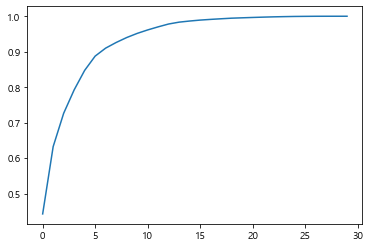

In [46]:
# n_components = 30일떄 (원래)
pca = PCA(n_components = 30)
pca.fit(X_scaled)
# 2개의 주성분을 출력

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)   # 주성분

print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
# 569, 30

print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

# elbow를 시각적으로 확인
plt.plot(np.cumsum(pca.explained_variance_ratio_))

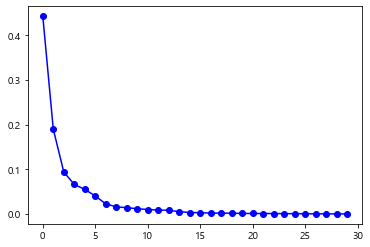

In [47]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)   # 전체 변수 30개 
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_t_test, y_test)))

# 6 : 92%
# 9 : 94%

# 15 : 94%
# 20 : 95%
# 30 : 97%

# 9개까지 ok.. 충분
# 3%를 위해서 15개 쓰는건 낭비 ? 가성비가 낮다


SVM 테스트 정확도: 0.92


C:\Users\ICT01_01\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
print("PCA 주성분 형태:{}".format(pca.components_.shape))
# 6,30 주성분을 30개의 변수가 설명 -> 주성분 축 : 명명
# 변수의 기여도를 보고 명명식

PCA 주성분 형태:(6, 30)


In [50]:
print("PCA 주성분 :{}".format(pca.components_)) #  주성분 6개 변수를 만들어낸것. (종속변수에 가장 영향을 주는)

PCA 주성분 :[[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-0

C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


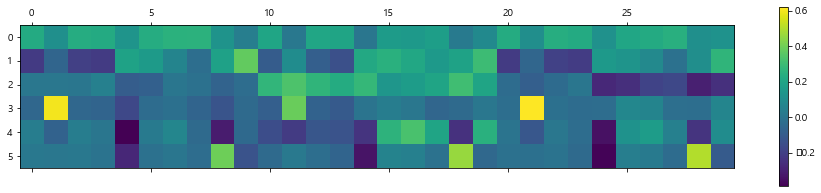

In [51]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

In [ ]:
# 여기사브터 다시

(87, 65)


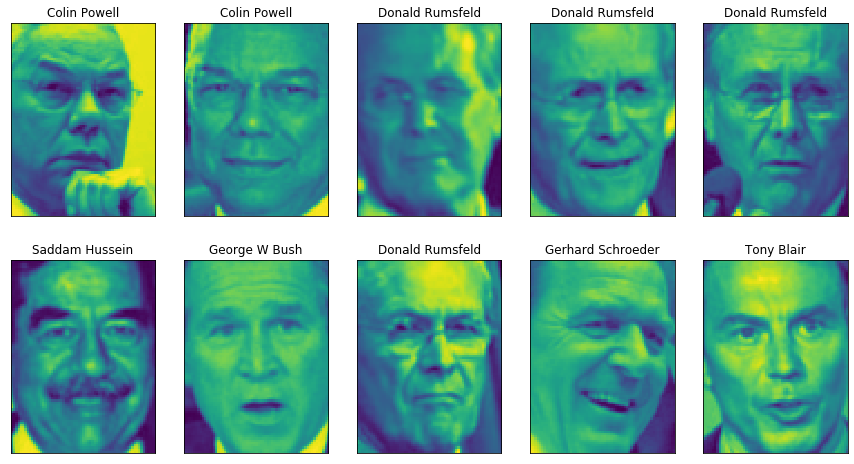

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape) # 87*65 , 이미지를 가로x세로, 행렬 행부터
fig, axes = plt.subplots(2,5,figsize = (15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images,
                            axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])   

In [2]:
print("이미지 사이즈:{}".format(people.images.shape))
print("클래스 개수:{}".format(len(people.target_names)))

이미지 사이즈:(2183, 87, 65)
클래스 개수:33


In [5]:
import numpy as np
mask = np.zeros(people.target.shape,dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_poeple = X_people/255.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=0)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

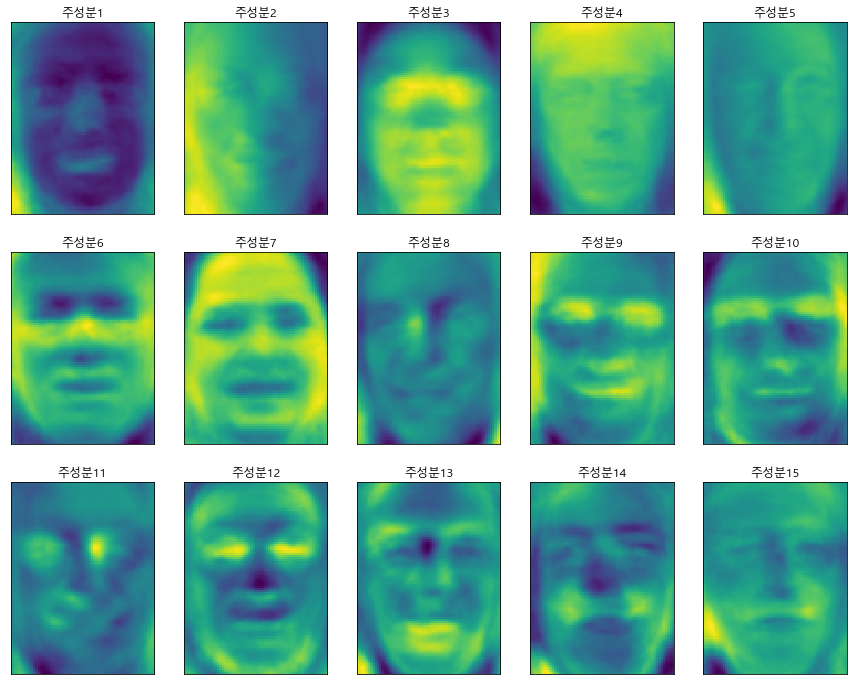

In [54]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks' : (), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분{}".format((i+1)))

In [ ]:
# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
  100개를 합하여 출력 원본 이미지를 복원 => ANN 의 가중치 특징도 아직 설명 할 수 없다.
    그렇ㅅ다고해서 쓸수 없다는게 아니라